In [367]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage

In [368]:
df=pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [369]:
df.isna().sum()

,0
RND,0
ADMIN,0
MKT,0
STATE,0
PROFIT,0


In [370]:
le=LabelEncoder()
for col in df.columns:
  if (df[col].dtypes=="O"):
    df[col]=le.fit_transform(df[col])

df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [371]:
X=df[["PROFIT"]]

In [372]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

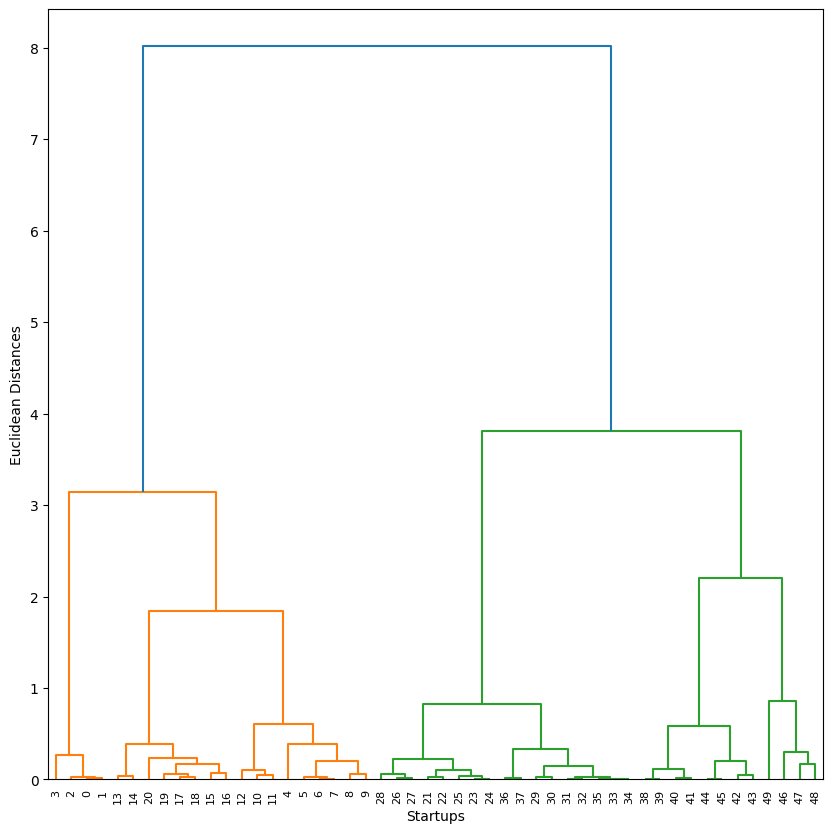

In [373]:
plt.figure(figsize=(10,10))
dendrogram(linkage(X_scaled,method="ward"))
plt.xlabel('Startups')
plt.ylabel('Euclidean Distances')
plt.show()

In [374]:
model=AgglomerativeClustering(n_clusters=4,linkage="ward")
df["Cluster"]=model.fit_predict(X_scaled)

In [375]:
df[["PROFIT","Cluster"]]

,PROFIT,Cluster
0,192261.83,3
1,191792.06,3
2,191050.39,3
3,182901.99,3
4,166187.94,1
5,156991.12,1
6,156122.51,1
7,155752.60,1
8,152211.77,1
9,149759.96,1


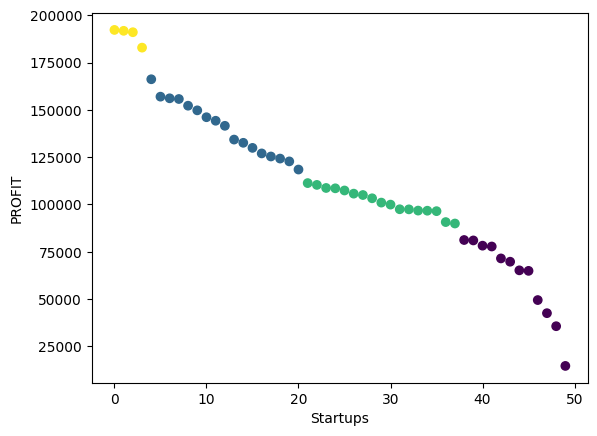

In [376]:
plt.scatter(df.index,df["PROFIT"],c=df["Cluster"])
plt.xlabel("Startups")
plt.ylabel("PROFIT")
plt.show()